In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

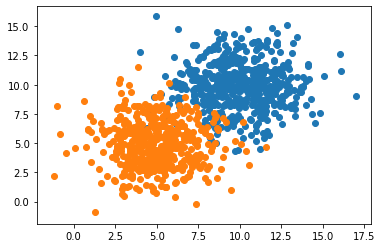

In [25]:
n_pts=500
topregx1=np.random.normal(10,2,n_pts)
topregx2=np.random.normal(10,2,n_pts)
botregx1=np.random.normal(5,2,n_pts)
botregx2=np.random.normal(5,2,n_pts)

topreg=np.array([topregx1,topregx2]).T
botreg=np.array([botregx1,botregx2]).T

features=np.vstack((topreg,botreg))

labels=np.matrix(np.append(np.ones(n_pts),np.zeros(n_pts))).T

plt.scatter(features[:n_pts,0],features[:n_pts,1])
plt.scatter(features[n_pts:,0],features[n_pts:,1])
plt.show()
labels=to_categorical(labels,2)

In [0]:
model=Sequential()
model.add(Dense(units=2,input_dim=2,activation='sigmoid'))
model.compile(Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])


In [29]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
h=model.fit(features,labels,epochs=100,verbose=1)

Epoch 1/100
1000/1000 [==============================] - 0s 259us/step - loss: 1.2512 - acc: 0.5185
Epoch 2/100
1000/1000 [==============================] - 0s 86us/step - loss: 0.7237 - acc: 0.5685
Epoch 3/100
1000/1000 [==============================] - 0s 85us/step - loss: 0.6778 - acc: 0.6145
Epoch 4/100
1000/1000 [==============================] - 0s 102us/step - loss: 0.6354 - acc: 0.6560
Epoch 5/100
1000/1000 [==============================] - 0s 85us/step - loss: 0.5940 - acc: 0.6870
Epoch 6/100
1000/1000 [==============================] - 0s 96us/step - loss: 0.5564 - acc: 0.7315
Epoch 7/100
1000/1000 [==============================] - 0s 101us/step - loss: 0.5223 - acc: 0.7645
Epoch 8/100
1000/1000 [==============================] - 0s 92us/step - loss: 0.4928 - acc: 0.7930
Epoch 9/100
1000/1000 [==============================] - 0s 88us/step - loss: 0.4649 - acc: 0.8130
Epoch 10/100
1000/1000 [==============================] - 0s 103us/step - loss: 0.4430 - acc: 0.8370
Epoch

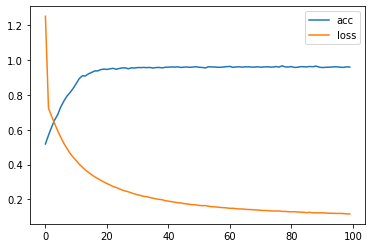

In [31]:
plt.plot(h.history['acc'],label='acc')
plt.plot(h.history['loss'],label='loss')
plt.legend()
plt.show()

In [32]:
model.predict(np.array([[20,7]]))

array([[2.063420e-04, 9.998795e-01]], dtype=float32)

In [33]:
model.predict_classes(np.array([[20,7]]))

array([1])

In [0]:
x_max,x_min=features[:,0].min()-1,features[:,0].max()+1
y_max,y_min=features[:,1].min()-1,features[:,1].max()+1
xx,yy=np.meshgrid(np.linspace(x_min,x_max),np.linspace(y_min,y_max))
grid=np.c_[xx.ravel(),yy.ravel()]
pred=model.predict(grid)[:,1].reshape(xx.shape)

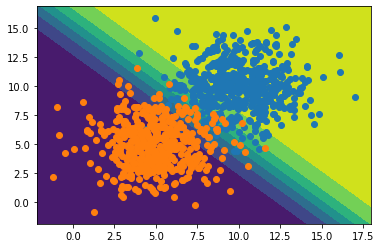

In [40]:
plt.contourf(xx,yy,pred)
plt.scatter(features[:n_pts,0],features[:n_pts,1])
plt.scatter(features[n_pts:,0],features[n_pts:,1])
plt.show()